Loading data...
Dataset loaded: 319 samples, 39 features

DATASET OVERVIEW
Shape: (319, 39)
Columns: ['Gallstone Status', 'Age', 'Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Height', 'Weight', 'Body Mass Index (BMI)', 'Total Body Water (TBW)', 'Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)', 'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)', 'Visceral Muscle Area (VMA) (Kg)', 'Hepatic Fat Accumulation (HFA)', 'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'Glomerular Filtration Rate (GFR)', 'C-Rea

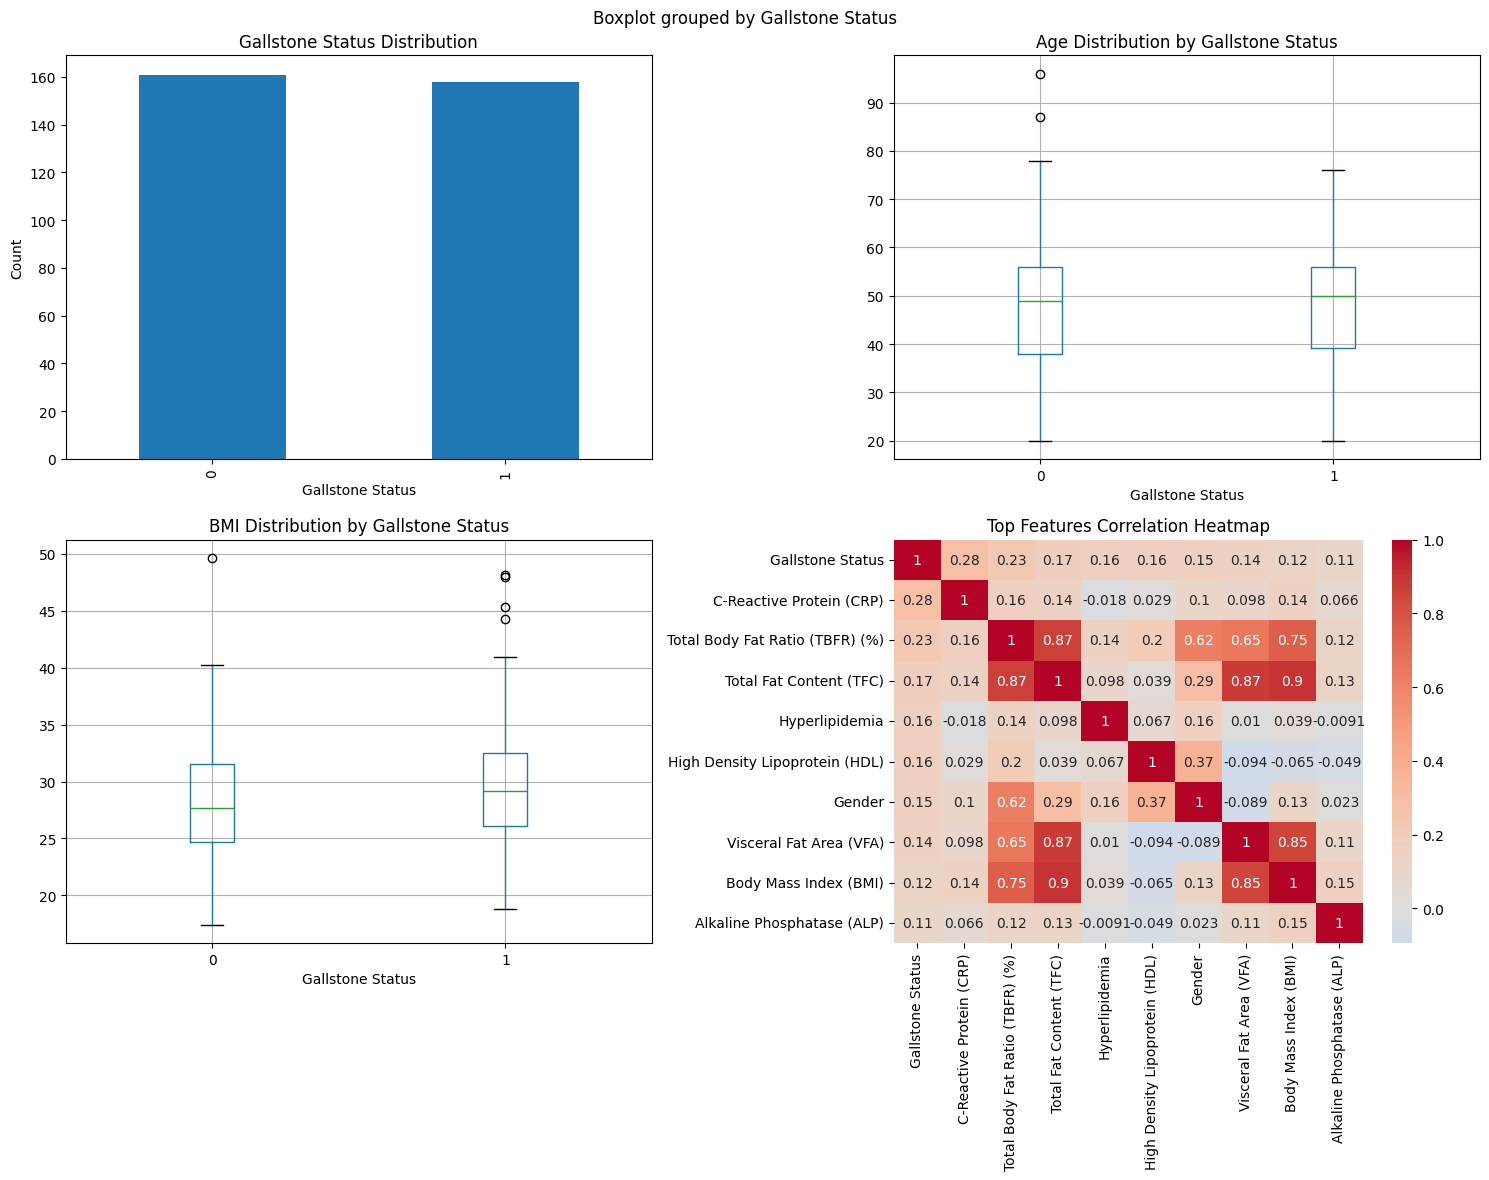


DATA PREPROCESSING COMPLETE!
You can now use X_train, X_test, y_train, y_test for model training
The preprocessor object is saved and ready for future use

Sample of processed training data:
          Age    Gender  Comorbidity  Coronary Artery Disease (CAD)  \
241  0.957108  1.003929    -0.668013                      -0.179969   
66  -1.146880 -0.996086     1.312723                      -0.179969   
230  0.228805 -0.996086     1.312723                      -0.179969   
42   0.228805 -0.996086    -0.668013                      -0.179969   
280  0.390650  1.003929     1.312723                      -0.179969   

     Hypothyroidism  Hyperlipidemia  Diabetes Mellitus (DM)    Height  \
241       -0.191273        -0.15523               -0.398862 -1.114167   
66        -0.191273        -0.15523               -0.398862  0.455516   
230       -0.191273        -0.15523                2.507133 -0.231220   
42        -0.191273        -0.15523               -0.398862  0.455516   
280       -0.191

In [19]:
# Import the required libraries first
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Your GallstoneDataPreprocessor class code goes here first
# (paste the entire class definition)

# Then use it like this:
def main():
    # Initialize the preprocessor
    preprocessor = GallstoneDataPreprocessor()
    
    # Load your data
    print("Loading data...")
    df = preprocessor.load_data('GallStoneData.xlsx')
    
    # Display basic info about the dataset
    print("\n" + "="*50)
    print("DATASET OVERVIEW")
    print("="*50)
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    
    # Check for missing values
    print("\n" + "="*50)
    print("MISSING VALUES")
    print("="*50)
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(missing[missing > 0])
    else:
        print("No missing values found!")
    
    # Display target variable distribution
    print("\n" + "="*50)
    print("TARGET VARIABLE DISTRIBUTION")
    print("="*50)
    target_dist = df['Gallstone Status'].value_counts()
    print(target_dist)
    print("\nPercentages:")
    print(df['Gallstone Status'].value_counts(normalize=True) * 100)
    
    # Perform EDA
    print("\n" + "="*50)
    print("PERFORMING EDA...")
    print("="*50)
    eda_results = preprocessor.perform_eda(df)
    
    # Show correlations with target
    print("\nTop correlations with Gallstone Status:")
    correlations = eda_results['correlations'].dropna()
    print(correlations.head(10))
    
    # Prepare the data for modeling
    print("\n" + "="*50)
    print("PREPARING DATA FOR MODELING...")
    print("="*50)
    
    X_train, X_test, y_train, y_test = preprocessor.prepare_data(df, test_size=0.2, random_state=42)
    
    print(f"Training set shape: {X_train.shape}")
    print(f"Test set shape: {X_test.shape}")
    print(f"Training target distribution:")
    print(y_train.value_counts())
    
    # Display feature names after preprocessing
    print(f"\nFeatures after preprocessing: {list(X_train.columns)}")
    
    # Save preprocessing objects
    print("\n" + "="*50)
    print("SAVING PREPROCESSING OBJECTS...")
    print("="*50)
    preprocessor.save_preprocessor()
    
    # Create some basic visualizations
    print("\n" + "="*50)
    print("CREATING VISUALIZATIONS...")
    print("="*50)
    
    # Set up the plotting style
    plt.style.use('default')
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Target distribution
    df['Gallstone Status'].value_counts().plot(kind='bar', ax=axes[0,0])
    axes[0,0].set_title('Gallstone Status Distribution')
    axes[0,0].set_ylabel('Count')
    
    # 2. Age distribution by gallstone status
    if 'Age' in df.columns:
        df.boxplot(column='Age', by='Gallstone Status', ax=axes[0,1])
        axes[0,1].set_title('Age Distribution by Gallstone Status')
    
    # 3. BMI distribution by gallstone status
    if 'BMI' in df.columns:
        df.boxplot(column='BMI', by='Gallstone Status', ax=axes[1,0])
        axes[1,0].set_title('BMI Distribution by Gallstone Status')
    
    # 4. Correlation heatmap (top correlations)
    top_corr_features = correlations.abs().head(10).index.tolist()
    if len(top_corr_features) > 1:
        corr_matrix = df[top_corr_features].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
        axes[1,1].set_title('Top Features Correlation Heatmap')
    
    plt.tight_layout()
    plt.show()
    
    return X_train, X_test, y_train, y_test, preprocessor

# Run the main function
if __name__ == "__main__":
    X_train, X_test, y_train, y_test, preprocessor = main()
    print("\n" + "="*50)
    print("DATA PREPROCESSING COMPLETE!")
    print("="*50)
    print("You can now use X_train, X_test, y_train, y_test for model training")
    print("The preprocessor object is saved and ready for future use")

# Optional: Display sample of processed data
print("\nSample of processed training data:")
print(X_train.head())
print("\nData types:")
print(X_train.dtypes)